In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('numpy:', np.version.version)
print('pandas:', pd.__version__)
dataset = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
dataset.columns
dataset = dataset.sample(frac=0.12)
df = dataset.copy()#.head(250)

numpy: 1.24.3
pandas: 2.0.3


In [57]:
# gender_mapping = {'Male': 0, 'Female': 1}
# Map the values in the 'Gender' column using the mapping dictionary
# df['Gender'] = df['Gender'].map(gender_mapping)
df["Weight"] = (df["Weight"]-df["Weight"].mean())/df["Weight"].std()#standardization of the dataset
df["Height"] = (df["Height"]-df["Height"].mean())/df["Height"].std() #standardization of the dataset

X = df[["Weight"]]
y = df[["Height"]]
# df.shape
print(X.shape, y.shape)

(1200, 1) (1200, 1)


Linear Regression

In [96]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, tolerance=1e-5, cost_function="mae", descent_type="batch"):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.tolerance = tolerance
        self.weight = None
        self.bias = None
        self.cost_function = cost_function
        self.descent_type = descent_type

        # Choose the cost function based on the provided parameter
        if cost_function == "mae":
            self.cost_function = self.cost_function_mae
            self.gradient_function = self.gradient_mae
        elif cost_function == "mse":
            self.cost_function = self.cost_function_mse
            self.gradient_function = self.gradient_mse
        else:
            raise ValueError("Invalid cost_function. Choose 'mae' or 'mse'.")

    # def cost_function_mae(self, y_predicted, y):
    #     # Mean Absolute Error (MAE)
    #     return np.mean(np.abs(y_predicted - y))
    
    # def cost_function_mse(self, y_true, y_pred):
    #     # Mean Squared Error (MSE)
    #     return np.mean((y_pred - y_true) ** 2)
    
    # def gradient_mae(self, X, y, y_predicted):
    #     num_samples = len(X)
    #     error = y_predicted - y
    #     dw = (1 / num_samples) * np.dot(X.T, np.sign(error))
    #     db = (1 / num_samples) * np.sum(np.sign(error))
    #     return dw, db

    # def gradient_mse(self, X, y, y_predicted):
    #     num_samples = len(X)
    #     error = y_predicted - y
    #     dw = (1 / num_samples) * np.dot(X.T, 2 * error)
    #     db = (1 / num_samples) * np.sum(2 *  error)
    #     return dw, db
    def _compute_cost(self, y_predicted, y):
        if self.cost_function == "mae":
            return np.mean(np.abs(y_predicted - y))
        elif self.cost_function == "mse":
            return np.mean((y_predicted - y) ** 2)
        else:
            raise ValueError("Invalid cost_function. Choose 'mae' or 'mse'.")
        
    def _compute_gradient(self, X, y, y_predicted):
        if self.cost_function == "mae":
            num_samples = len(X)
            dw = (1 / num_samples) * np.dot(X.T, np.sign(y_predicted - y))
            db = (1 / num_samples) * np.sum(np.sign(y_predicted - y))
            return dw, db
        elif self.cost_function == "mse":
            num_samples = len(X)
            dw = (1 / num_samples) * np.dot(X.T, 2 * (y_predicted - y))
            db = (1 / num_samples) * np.sum(2 * (y_predicted - y))
            return dw, db
        else:
            raise ValueError("Invalid cost_function. Choose 'mae' or 'mse'.")
    
    # R-squared (R^2) score | Regression Metric
    def r_squared(self, y_predicted, y):
        # Calculate the sum of squared residuals
        ssr = np.sum((y - y_predicted) ** 2)
        # Calculate the total sum of squares
        sst = np.sum((y - np.mean(y)) ** 2)
        # Calculate R-squared
        r2 = 1 - (ssr / sst)
        return r2
    
    def gradient_descent(self, X, y):
        cost_history = []
        bias_history = []
        weight_history = []
        prev_cost = float('inf')
        
        for _ in range(self.num_iterations + 1):
            # Linear equation: y = wx + b
            y_predicted = np.dot(X, self.weight) + self.bias
            
            # Cost function
            cost = self.cost_function(y_predicted, y.values)
            # Compute gradients
            dw, db = self.gradient_function(X, y.values, y_predicted)

            # Update parameters using gradient descent
            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            cost_history.append(cost)
            bias_history.append(self.bias)
            weight_history.append(self.weight.flatten())

            model_data = {
                "biases": bias_history,
                "weights": weight_history,
                "cost": cost_history
            }
            # Print cost to monitor convergence
            if _ % 50 == 0:
                print(f"Iteration {_}: CostFuntion = {cost:.5f} Weight {self.weight.round(5)} Bias {self.bias:.5f}")
            
            # Check for convergence using change in cost
            if self.num_iterations > 0 and abs(cost - prev_cost) < self.tolerance:
                print(f"Converged after {_ + 1} iterations.")
                break
            prev_cost = cost

        return self.weight, self.bias, model_data
    
    def _mini_batch_gradient_descent(self, X, y):
        pass
    
    def _batch_gradient_descent(self, X, y):
        cost_history = []
        bias_history = []
        weight_history = []
        prev_cost = float('inf')

        for _ in range(self.num_iterations + 1):
            # Linear equation: y = wx + b
            y_predicted = np.dot(X, self.weight) + self.bias

            # Cost function
            cost = self._compute_cost(y_predicted, y)
            # Compute gradients
            dw, db = self._compute_gradient(X, y, y_predicted)

            # Update parameters using gradient descent
            self.weight -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            cost_history.append(cost)
            bias_history.append(self.bias)
            weight_history.append(self.weight.flatten())

            model_data = {
                "biases": bias_history,
                "weights": weight_history,
                "cost": cost_history
            }
            # Print cost to monitor convergence
            if _ % 50 == 0:
                print(f"Iteration {_}: Cost = {cost:.5f}")
            # Check for convergence using change in cost
            if self.num_iterations > 0 and abs(cost - prev_cost) < self.tolerance:
                print(f"Converged after {_ + 1} iterations.")
                break

            prev_cost = cost

        return self.weight, self.bias, model_data

    def fit(self, X, y):
        num_samples, num_features = X.shape
        # Initialize weights and bias
        self.weight = np.zeros(num_features).reshape(num_features,1)# np.random.normal(0,1, (num_features, 1))  # Reshaped to (num_features, 1) for matrix dot mupltiplication
        self.bias = 0

        # Gradient Descent for convergence
        if self.descent_type == "batch":
            weight, bias, cost_history = self._batch_gradient_descent(X, y)
        elif self.descent_type == "stochastic":
            # Implement stochastic gradient descent
            weight, bias, cost_history = self._stochastic_gradient_descent(X, y)
            pass
        elif self.descent_type == "mini_batch":
            # Implement mini-batch gradient descent
            weight, bias, cost_history = self._mini_batch_gradient_descent(X, y)
            pass
        else:
            raise ValueError("Invalid descent_type. Choose 'batch', 'stochastic', or 'mini_batch'.")

        # # Gradient Descent for convergence
        # weight, bias, model_data = self.gradient_descent(X, y)

        # Calculate R-squared
        y_predicted = np.dot(X, weight) + bias
        r2_score = self.r_squared(y_predicted, y.values)
        print(f"R-squared Metric: {r2_score:.4f}")
        print(f"Final Wight: {weight.round(5)} \nFinal Bias: {bias:.5f}")
        return weight, bias, model_data

    def predict(self, X):
        return np.dot(X, self.weight) + self.bias

# Example usage:
model = LinearRegression(learning_rate=0.01, num_iterations=500, tolerance=1e-4)
weights, biases, model_data = model.fit(X, y)

Iteration 0: CostFuntion = 0.82352 Weight [[0.0078]] Bias 0.00002
Iteration 50: CostFuntion = 0.54185 Weight [[0.38227]] Bias 0.00170
Iteration 100: CostFuntion = 0.36578 Weight [[0.67493]] Bias 0.00478
Iteration 150: CostFuntion = 0.31057 Weight [[0.83391]] Bias 0.00627
Converged after 180 iterations.
R-squared Metric: 0.8537
Final Wight: [[0.87481]] 
Final Bias: 0.00355


Plots for Simple Linear Regression

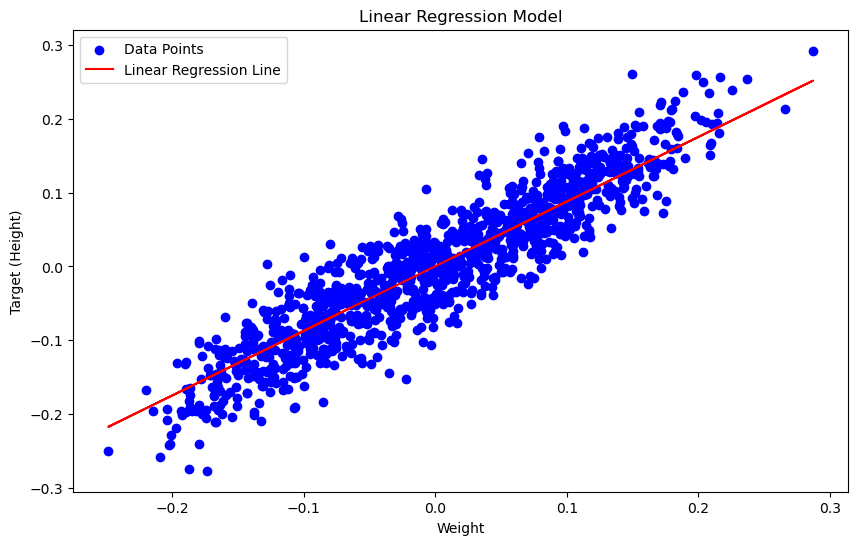

In [97]:
#Plots
plt.figure(figsize=(10, 6))
# Plot the data points
plt.scatter(X["Weight"]/10, y/10, label='Data Points', c='blue')

# Plot the linear regression line
y_pred = np.squeeze(model.predict(X))
plt.plot(X["Weight"]/10, y_pred/10, label='Linear Regression Line', c='red')
# Add labels and a legend
plt.xlabel('Weight')
plt.ylabel('Target (Height)')
plt.legend()
# Show the plot
plt.title('Linear Regression Model')
plt.show()

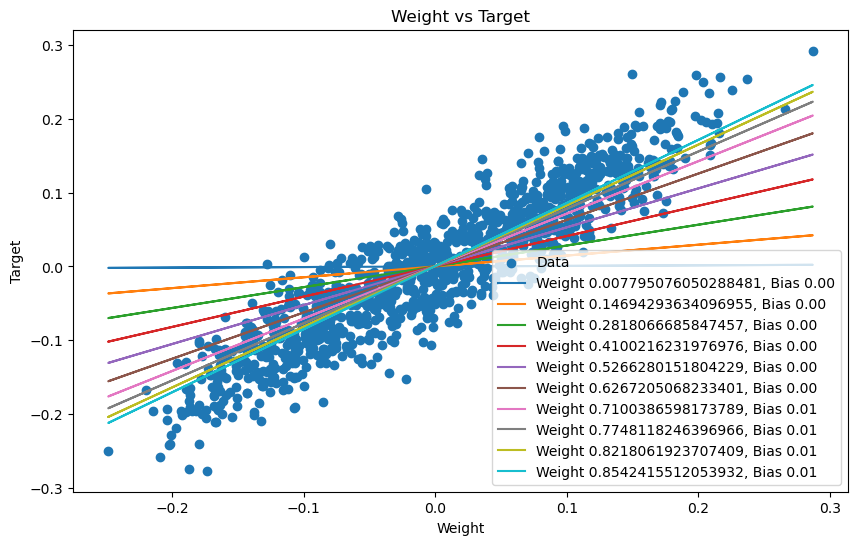

In [100]:
# Plot for all weights and bias for 1st featture
plt.figure(figsize=(10, 6))
plt.scatter(X[["Weight"]]/10, y/10, label='Data')

feature1 = "Weight"
feature2 = "Gender"
num_of_weights = len(model_data["weights"])
# Plot predictions for various weights and biases
for i in range(0, num_of_weights, int(num_of_weights*0.10)):
    weight = model_data["weights"][i][0]
    bias = model_data["biases"][i]

    # print(np.array(weight).shape)
    # Calculate predictions for the given weight and bias
    prediction = np.dot(X[["Weight"]], weight) + bias  # Use only the first column of X

    # Plot the predictions
    plt.plot(X[["Weight"]]/10, prediction/10, label=f'Weight {weight}, Bias {bias:.2f}')
plt.title("Weight vs Target")
plt.xlabel('Weight')
plt.ylabel('Target')
plt.legend()
plt.show()